In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import plotly.graph_objects as go
from poliastro.bodies import Earth
from scipy.integrate import solve_ivp
plt.rcParams['font.family'] = 'Serif'
import sympy as sp
sp.init_printing()

# 3.1 Introduction

Obtaining position as a function of time is easy for circular orbits. For elliptical, parabolic and hyperbolic paths, we are led to the different forms of Kepler's equation relating position aand time. These equations must be solved using numerical methods, which is shown in this chapter. Moreover, the different forms of Kepler's equations are combined into a single universal Kepler's equation by intoducing universal variables.

# 3.2 Time Since Periapsis

The orbit formula
$$
    r = \frac{p}{1 + e\cos\theta}
$$
gives the position of $m_2$ around $m_1$ as a function of the true anomaly $\theta$. However, in order to determine this position as a function of time, we need to figure out a way to determine the time required to fly between any two true anomalies. The purpose of this section is to establish the formulation that allows us to do that determination.

The one equation which relates time directly to true anomaly is the constancy of the specific angular momentum,
$$
    \dot\theta = \frac{h}{r^2}
$$
Substituting the orbit equation and performing the separation of variables, we get
$$
    \frac{\mu^2}{h^3}dt = \frac{d\theta}{(1 + e\cos\theta)^2}
$$
Integrating both sides of this equation yields,
$$
    \frac{\mu^2}{h^3}(t - t_p) = \int_0^{\theta}\frac{d\upsilon}{(1 + e\cos\upsilon)^2}
$$
where $t_p$ is the integration constant defined to be that time at the periapsis passage. $t_p$ is the sixth constant of motion. It is conveninent to measure time from periapsis passage, so we will eventually set $t_p=0$. Thus, we have
$$
    t = \frac{h^3}{\mu^2}\int_0^{\theta}\frac{d\upsilon}{(1 + e\cos\upsilon)^2}
$$
The specific form of the integral on the RHS depends on whether the value of $e$ belongs to a circle, ellipse, parabola or hyperbola.

# 3.3 Circular Orbits

For circular orbits, $e=0$. Thus, we directly get
$$
    t = \frac{h^3}{\mu^2}\theta
$$
Using the fact that for circles, $r = h^2/\mu$ and the formulation for the time period $T$ as,
$$
    T = \frac{2\pi}{\sqrt\mu}r^{3/2}
$$
we can rewrite the time relation as
$$
    t = \frac{r^{3/2}}{\sqrt\mu}\theta; \ \ \ \theta = \frac{2\pi}{T}t = \omega t
$$

# 3.4 Elliptical Orbits

For $0<e<1$, we find in integral tables that,
$$
    \int_0^{\theta}\frac{d\upsilon}{(1 + e\cos\upsilon)^2} = \frac{1}{(1 - e^2)^{3/2}}\left[2\tan^{-1}\left(\sqrt{\frac{1 - e}{1 + e}}\tan\frac{\theta}{2} \right) - \frac{e\sqrt{1 - e^2}\sin\theta}{1 + e\cos\theta}\right]
$$
Therefore, the time since periapsis becomes,
$$
    \frac{\mu^2}{h^3}t = \frac{1}{(1 - e^2)^{3/2}}\left[2\tan^{-1}\left(\sqrt{\frac{1 - e}{1 + e}}\tan\frac{\theta}{2} \right) - \frac{e\sqrt{1 - e^2}\sin\theta}{1 + e\cos\theta}\right]
$$
or
$$
    M_e = 2\tan^{-1}\left(\sqrt{\frac{1 - e}{1 + e}}\tan\frac{\theta}{2} \right) - \frac{e\sqrt{1 - e^2}\sin\theta}{1 + e\cos\theta}
$$
where, 
$$
    M_e = \frac{\mu^2}{h^3}(1 - e^2)^{3/2}t
$$
is called the mean anomaly.

In [78]:
def Me_calc(th, e):
    return 2*((np.arctan(np.sqrt((1 - e)/(1 + e))*np.tan(th/2)) + np.pi)%np.pi) - e*np.sqrt(1 - e**2)*np.sin(th)/(1 + e*np.cos(th))

In [99]:
theta = np.linspace(0, 2*np.pi, 500)

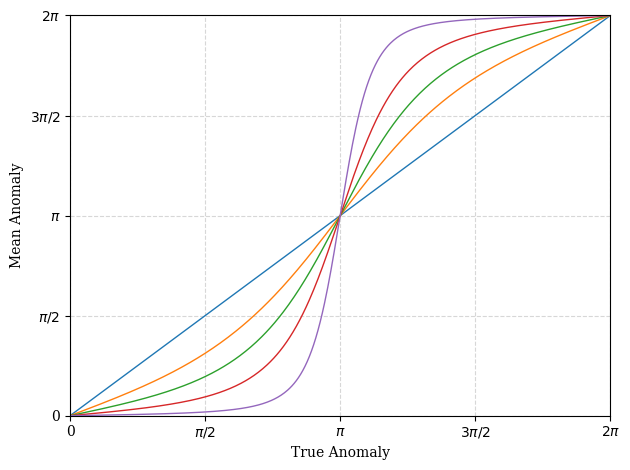

In [118]:
plt.plot(theta[:-1], Me_calc(theta[:-1], 0), lw=1);
plt.plot(theta[:-1], Me_calc(theta[:-1], 0.3), lw=1);
plt.plot(theta[:-1], Me_calc(theta[:-1], 0.5), lw=1);
plt.plot(theta[:-1], Me_calc(theta[:-1], 0.7), lw=1);
plt.plot(theta[:-1], Me_calc(theta[:-1], 0.9), lw=1);
plt.grid(ls='--', alpha=0.5)
plt.xticks([0, np.pi/2, np.pi,  np.pi + np.pi/2,  np.pi + np.pi], ['0', '$\pi/2$', '$\pi$', '$3\pi/2$', '$2\pi$'])
plt.yticks([0, np.pi/2, np.pi,  np.pi + np.pi/2,  np.pi + np.pi], ['0', '$\pi/2$', '$\pi$', '$3\pi/2$', '$2\pi$'])
# plt.axis('square')
plt.xlim(0, 2*np.pi)
plt.ylim(0, 2*np.pi)
plt.xlabel('True Anomaly')
plt.ylabel('Mean Anomaly')
plt.tight_layout()

# 3.5 Parabolic Trajectories

# 3.6 Hyperbolic Trajectories

# 3.7 Universal Variables